In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import os

sns.set_theme(style="whitegrid", context="paper", palette="binary")
formatter = ticker.ScalarFormatter(useMathText=True)

# MLP Base Classifier

In [43]:
manila_mlp = pd.read_csv(os.path.join("manila_full_mlp", "measures.csv"))
manila_mlp_time = pd.read_fwf(os.path.join("manila_full_mlp", "times.txt"), header=None)
manila_mlp['time'] = manila_mlp_time

In [44]:
our_mlp = pd.read_csv(os.path.join("our_approach_mlp", "measures.csv"))
our_mlp_time = pd.read_fwf(os.path.join("our_approach_mlp", "times.txt"), header=None)
our_mlp["time"] = our_mlp_time

In [48]:
our_mlp['method'] = 'Our approach'
manila_mlp['method'] = 'Baseline'
full_mlp = pd.concat(
    [
        manila_mlp,
        our_mlp
    ]
)
full_mlp

,pkg,dram,duration,time,method,label,timestamp,socket
0,2.660181e+09,9.829101e+07,1.777660e+08,179.212476,Baseline,NaN,NaN,NaN
1,2.657124e+09,9.849050e+07,1.784617e+08,178.196058,Baseline,NaN,NaN,NaN
2,2.672012e+09,9.868693e+07,1.789471e+08,178.762414,Baseline,NaN,NaN,NaN
3,2.679951e+09,9.821266e+07,1.786366e+08,177.928489,Baseline,NaN,NaN,NaN
4,2.669976e+09,9.853734e+07,1.781652e+08,178.530157,Baseline,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
455,7.033070e+05,1.318300e+04,2.377895e+04,0.023776,Our approach,bar,1.709117e+09,0.0
456,4.162526e+06,4.656970e+05,2.027487e+05,0.202745,Our approach,bar,1.709117e+09,0.0
457,6.534400e+05,2.410900e+04,2.460760e+04,0.024605,Our approach,bar,1.709117e+09,0.0
458,5.574083e+06,2.154540e+05,2.554058e+05,0.255402,Our approach,bar,1.709117e+09,0.0


## CPU Consumption

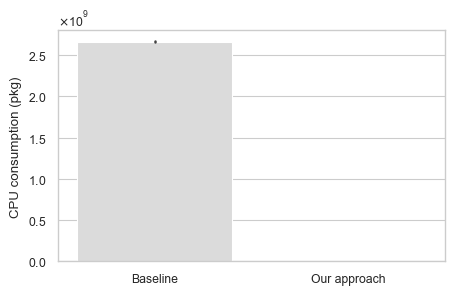

In [66]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(
    data=full_mlp,
    x="method",
    y="pkg",
    ax=ax,
)
ax.set_ylabel('CPU consumption (pkg)')
ax.set_xlabel('')
ax.yaxis.set_major_formatter(formatter)
plt.savefig('figs/pkg_mlp.pdf', bbox_inches='tight')
plt.show()

In [50]:
stats.wilcoxon(manila_mlp["pkg"], our_mlp["pkg"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)

## Execution time

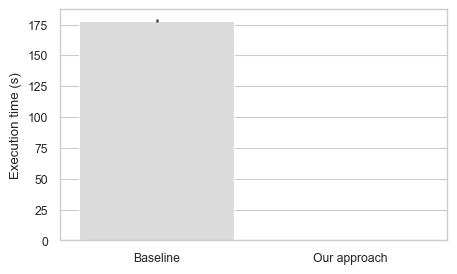

In [65]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full_mlp, x="method", y="time", hue="method", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
# plt.title("Execution time")
plt.savefig("figs/time_bin.pdf", bbox_inches="tight")
plt.show()

In [54]:
stats.wilcoxon(manila_mlp["time"], our_mlp["time"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)

# Random Forest Classifier

In [60]:
manila = pd.read_csv("manila_full_rf/measures.csv")
our = pd.read_csv("our_approach_rf/measures.csv")
manila_time = pd.read_fwf("manila_full_rf/times.txt", header=None)
manila["time"] = manila_time
our_time = pd.read_fwf("our_approach_rf/times.txt", header=None)
our["time"] = our_time
manila["approach"] = "Baseline"
our["approach"] = "Our approach"
full = pd.concat([manila, our])

## CPU consumption

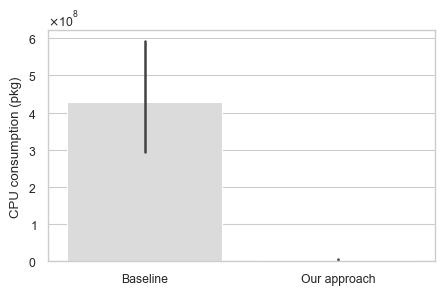

In [61]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x="approach", y="pkg", hue="approach", ax=ax)
ax.set_ylabel("CPU consumption (pkg)")
ax.set_xlabel("")
ax.yaxis.set_major_formatter(formatter)
plt.savefig("figs/pkg_rf.pdf", bbox_inches="tight")
plt.show()

In [62]:
stats.wilcoxon(manila["pkg"], our["pkg"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)

## Training time

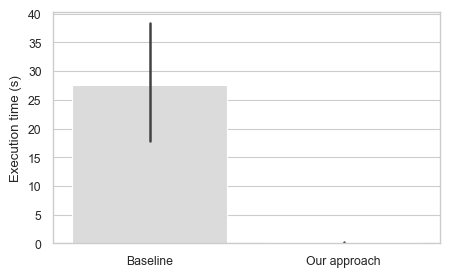

In [63]:
fig, ax = plt.subplots(figsize=(5, 3))
sns.barplot(data=full, x="approach", y="time", hue="approach", ax=ax)
ax.set_ylabel("Execution time (s)")
ax.set_xlabel("")
# plt.title("Execution time")
plt.savefig("figs/time_full.pdf", bbox_inches="tight")
plt.show()

In [64]:
stats.wilcoxon(manila["time"], our["time"])

WilcoxonResult(statistic=0.0, pvalue=4.3092972809371276e-77)